In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns


In [2]:
# load the dataset

data = pd.read_csv("country-data.csv")

data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# basic statistics

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# more basic info

data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# check for null amounts to see if any cleaning needs to be done

data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

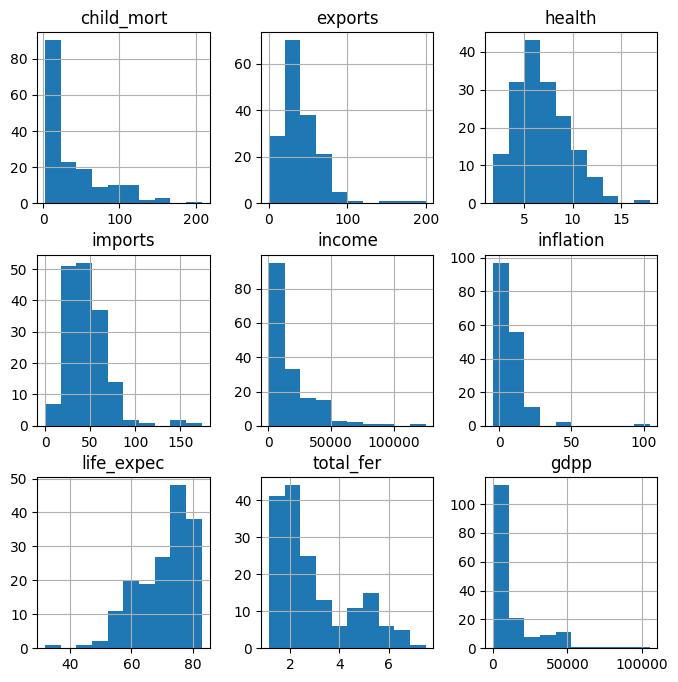

In [6]:
# distribution of data

data.hist(bins=10, figsize=(8,8))
plt.show()

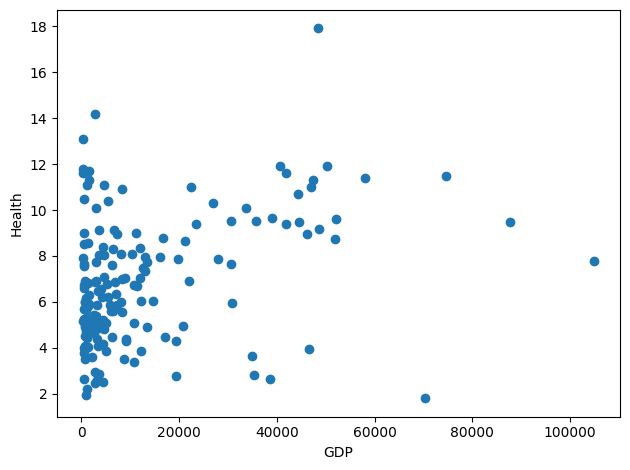

In [7]:
# scatter plot

plt.scatter(data['gdpp'], data['health'])
plt.xlabel('GDP')
plt.ylabel('Health')
plt.tight_layout()

<Axes: >

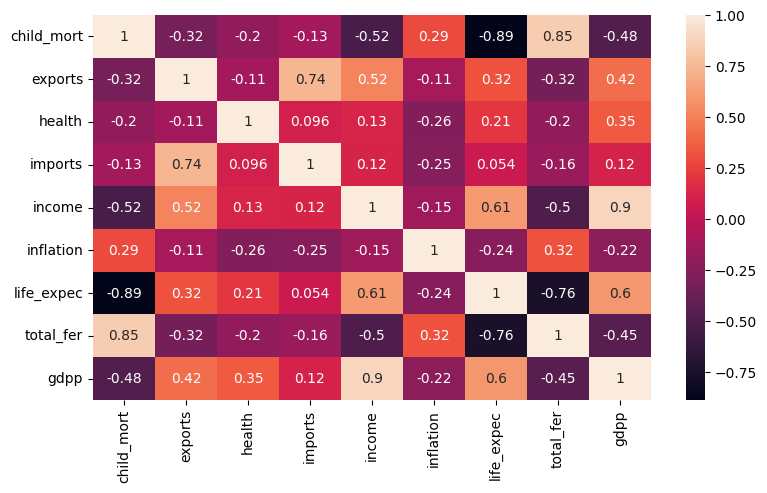

In [8]:
# correlation matrix

plt.figure(figsize=(9,5))
corr_mat = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_mat, annot =True)

In [10]:
# Data Preprocessing, exclude country names from clustering

data_pp = data.drop(columns=['country']) 

In [11]:
# Scaling the data, applying 'MinMax' scaling#

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data_pp)

In [ ]:
# Find the Optimal Number of Clusters (WCSS - Elbow Method)

# Find optimal K using said Elbow Method

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)  # Fit only on numeric scaled data
    wcss.append(kmeans.inertia_)

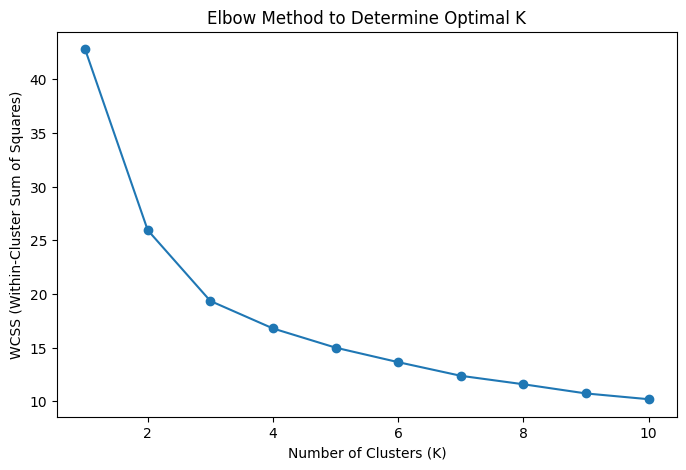

In [14]:
# Plot

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [15]:
# Apply K-Means Clustering with the chosen K (3)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [16]:
# Work out between sum sqaured

TSS = np.sum((X_scaled - X_scaled.mean(axis=0)) ** 2)
BCSS = TSS - kmeans.inertia_
print(f"WCSS: {kmeans.inertia_}")
print(f"BCSS: {BCSS}")
print(f"BCSS/WCSS Ratio: {BCSS / kmeans.inertia_}")


WCSS: 19.345622038883594
BCSS: 23.453096736803925
BCSS/WCSS Ratio: 1.2123206320098956


In [ ]:
# Select only numerical columns and add labels

numeric_cols = data.select_dtypes(include=['number'])  
numeric_cols['Cluster'] = kmeans.labels_  


In [22]:
# Calculate mean

print(numeric_cols.groupby('Cluster').mean())

         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0          4.835294  57.905882  8.921176  50.735294  46408.823529   2.595294   
1         93.284783  29.287174  6.338478  43.297826   3516.804348  12.097065   
2         22.248276  40.795276  6.245172  47.286964  12913.678161   7.527138   

         life_expec  total_fer          gdpp  
Cluster                                       
0         80.385294   1.750294  43897.058824  
1         59.393478   5.090217   1695.913043  
2         72.616092   2.283333   6833.356322  


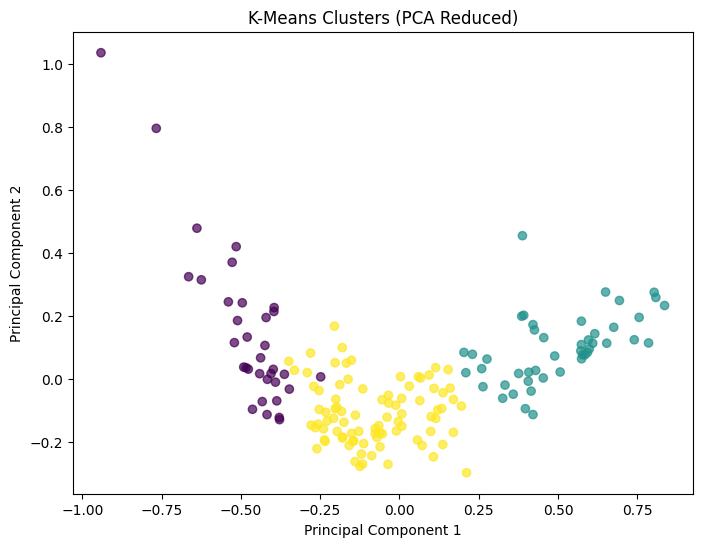

In [ ]:
# Visualise Clusters using PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (PCA Reduced)")
plt.show()